In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv('./seoul_4.csv')

In [2]:
df.head()

,gu_l,dong_l,s_c,used_y,square,per_cost_man,floor,YN_r,YN_top10,cost
0,0,8,1,32,77.75,1922.829582,7,1,1,149500
1,0,8,1,33,54.98,2619.134231,7,1,1,144000
2,0,8,1,33,79.97,2035.138177,7,1,1,162750
3,0,8,1,33,79.97,2000.750281,8,1,1,160000
4,0,8,1,33,79.97,1875.703389,5,1,1,150000


In [3]:
X = df.drop(['cost'], axis = 1)
y = df['cost']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2,
                                                   random_state = 99)

In [4]:
from lightgbm import LGBMRegressor

In [8]:
%time
lgb = LGBMRegressor(linear_tree = True,
                   boosting_type = 'gbdt',
                   objective = 'regression',
                   n_estimators = 9000,
                   learning_rate = 0.001,
                   max_depth = 4,
                   n_jobs = -1)

lgb.fit(X_train, y_train)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.87 µs


LGBMRegressor(learning_rate=0.001, linear_tree=True, max_depth=4,
              n_estimators=9000, objective='regression')

In [10]:
MSE = mean_squared_error(y_test, lgb.predict(X_test))

In [11]:
from math import sqrt
print(f'MSE : {MSE}')
print(f'RMSE : {sqrt(MSE)}')

MSE : 1840645.7708133506
RMSE : 1356.7040100233178


In [12]:
lgb.feature_importances_

array([  814,   775,   115,  3521, 65528, 58378,  1437,   492,    64],
      dtype=int32)

/home/ubuntu/anaconda3/envs/multi/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


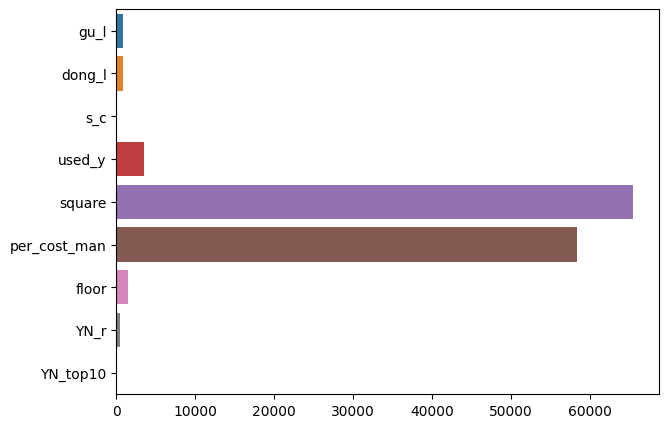

In [13]:
plt.figure(figsize=(7,5))
sns.barplot(lgb.feature_importances_,['gu_l', 'dong_l', 's_c', 'used_y', 'square', 'per_cost_man', 'floor',
       'YN_r', 'YN_top10'])
plt.show()

In [15]:
lgb.predict(X_test)

array([61639.22126685, 95455.92701305, 12672.29064517, ...,
       64198.58781466, 30043.93045572, 53401.96328612])

In [16]:
import joblib

joblib.dump(lgb, 'lgb_model.pkl')

['lgb_model.pkl']

In [17]:
lgb_from_joblib = joblib.load('lgb_model.pkl') 
lgb_from_joblib.predict(X_test)

array([61639.22126685, 95455.92701305, 12672.29064517, ...,
       64198.58781466, 30043.93045572, 53401.96328612])

In [14]:
# 하이퍼 파라미터 튜닝

from sklearn.model_selection import GridSearchCV

params = {
    'learning_rate' : [0.1, 0.01, 0.001, 0.0001],
    'max_depth' : [1,2,3,4]
}

grid_cv = GridSearchCV(lgb, param_grid = params, cv=4, scoring='neg_mean_squared_error', verbose=1)
grid_cv.fit(X_train, y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 